In [1]:
import MDAnalysis as mda
import numpy as np

import matplotlib.pyplot as plt

In [2]:
u = mda.Universe("data-file/conf.gro")
u.transfer_to_memory()

/home/simon/.local/lib/python3.10/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: 1
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/home/simon/.local/lib/python3.10/site-packages/MDAnalysis/core/universe.py:645: UserWarning: Reader has no dt information, set to 1.0 ps
  dt=self.trajectory.ts.dt * step,


In [3]:
contour1 = np.loadtxt("coordinate-py/contour1.dat")
contour2 = np.loadtxt("coordinate-py/contour2.dat")
area= np.loadtxt("coordinate-py/area.dat")
scale = 0.15 # 0.55

In [4]:
ids = []
for x, y in zip(u.atoms.positions.T[0], u.atoms.positions.T[1]):
    d1 = np.min(np.sqrt((x - area.T[0]*scale)**2 + (y - area.T[1]*scale)**2))
    d2 = np.min(np.sqrt((x + area.T[0]*scale)**2 + (y + area.T[1]*scale)**2))
    if d1 < 1:
        ids.append('2')
    elif d2 < 1:
        ids.append('3')
    else:
        ids.append('1')
ids = np.array(ids)
u.atoms.types = ids
u.atoms.names = ids

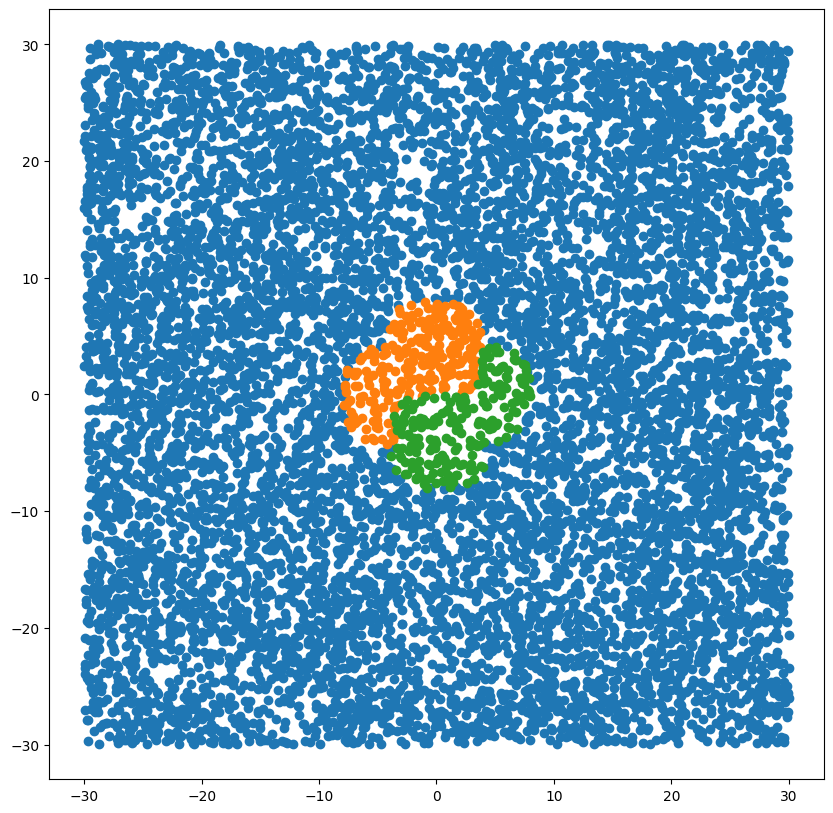

In [5]:
plt.figure(figsize=(10,10))
plt.plot(u.atoms.positions.T[0][ids=='1'], u.atoms.positions.T[1][ids=='1'], 'o')
plt.plot(u.atoms.positions.T[0][ids=='2'], u.atoms.positions.T[1][ids=='2'], 'o')
plt.plot(u.atoms.positions.T[0][ids=='3'], u.atoms.positions.T[1][ids=='3'], 'o')
plt.show()

In [6]:
u.atoms.write("conf.gro")